In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
%precision 3

'%.3f'

In [3]:
# %% 4.9.確認問題
# (1) リッジ回帰モデルを学習する反復式の導出
#   確率的勾配降下法でリッジ回帰モデルを学習したい．確率的勾配降下法の反復式を導出せよ．

# (2) L_2正則化を反復式から解釈する
#   リッジ回帰では，学習中にパラメータベクトルのL_2ノルムが大きくなりすぎないように制御する．
#  （1）で導出した反復式から，パラメータベクトルが大きくなりすぎるのを防ぐメカニズムを導出せよ．

# (3)リッジ回帰の実装
#   確率的勾配降下法でリッジ回帰のパラメータを推定するアルゴリズムを実装し，以下のデータに対して多項式近似
#   の曲線を求めよ．ただし，便利なモジュール等は使わずに，この資料で説明した式・アルゴリズムをプログラムとして
#   表現すること．多項式近似の次数やリッジ回帰の係数αなどのハイパーパラメータは適当に設定せよ．
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])
# X = [ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ]
# Y = [-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08]
# np.random.seed(0)


(3)


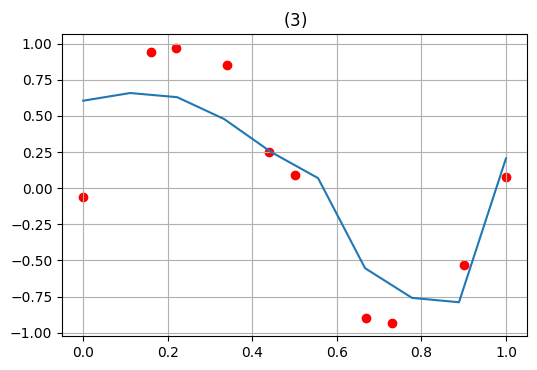

In [46]:
from sklearn.preprocessing import PolynomialFeatures
print('(3)')
def estimateParameta(X, Y, n=9, max_epochs=40000, eta0=1, eps=1e-4, alpha=0):
    # X = np.vstack([X, np.ones_like(X)]).T
    translormer = PolynomialFeatures(n, include_bias=True)
    F = translormer.fit_transform(X.reshape((-1,1)))
    w = np.zeros([F.shape[-1], 1])
    for t in range(max_epochs):
        eta = eta0 / np.sqrt(t+1)
        i = np.random.randint(len(X))
        X_i = F[i].reshape((-1,1))
        y_hat = X_i.T @ w
        grad = 2*(y_hat - Y[i]) * X_i + 2*(alpha*w)/len(X)
        if np.sum(np.abs(grad)) < eps:
            break
        w -= eta * grad
    return w
        

w = estimateParameta(X, Y,n=9, max_epochs=10000)
transformer = PolynomialFeatures(9, include_bias=True)
F = transformer.fit_transform(X.reshape((-1, 1)))
# # w = np.polyfit(X, Y, 9)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, c='r')
xs = np.linspace(0, 1, 10)
y_hat = (F @ w)
# y_hat = np.polyval(w, xs)
ax.plot(xs, y_hat)
ax.set_title('$(3)$')
ax.grid()
plt.show()

In [42]:
model.w

array([[ 0.403],
       [ 2.145],
       [-3.829],
       [-2.693],
       [-0.881],
       [ 0.4  ],
       [ 1.087],
       [ 1.323],
       [ 1.259],
       [ 1.005]])

In [32]:
from sklearn.preprocessing import PolynomialFeatures


class RidgeRegression():
    
    def __init__(self, degree):
        self.degree = degree
        self.w = None
    
    def train(self, X, Y, eta=1.0, alpha=1e-6, epoch=40000, eps=1e-4):
        N = len(X)
        transformer = PolynomialFeatures(self.degree, include_bias=True)
        F = transformer.fit_transform(X.reshape((-1, 1)))
        self.w = np.zeros([F.shape[-1], 1])
        for t in range(epoch):
            _eta = eta / np.sqrt(1 + t)
            i = np.random.choice(N)
            x_i = F[i].reshape((-1, 1))
            hat_y = x_i.T @ self.w
            grad = 2 * ((hat_y - Y[i]) * x_i + (alpha * self.w / N))
            if np.sum(np.abs(grad)) < eps:
                break
            self.w -= _eta * grad
        return self
        
    def predict(self, X):
        transformer = PolynomialFeatures(self.degree, include_bias=True)
        F = transformer.fit_transform(X.reshape((-1, 1)))
        print(F)
        return (F @ self.w).flatten()

In [36]:
model = RidgeRegression(degree=9).train(X, Y)
model.predict(X)

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.600e-01 2.560e-02 4.096e-03 6.554e-04 1.049e-04 1.678e-05
  2.684e-06 4.295e-07 6.872e-08]
 [1.000e+00 2.200e-01 4.840e-02 1.065e-02 2.343e-03 5.154e-04 1.134e-04
  2.494e-05 5.488e-06 1.207e-06]
 [1.000e+00 3.400e-01 1.156e-01 3.930e-02 1.336e-02 4.544e-03 1.545e-03
  5.252e-04 1.786e-04 6.072e-05]
 [1.000e+00 4.400e-01 1.936e-01 8.518e-02 3.748e-02 1.649e-02 7.256e-03
  3.193e-03 1.405e-03 6.181e-04]
 [1.000e+00 5.000e-01 2.500e-01 1.250e-01 6.250e-02 3.125e-02 1.562e-02
  7.812e-03 3.906e-03 1.953e-03]
 [1.000e+00 6.700e-01 4.489e-01 3.008e-01 2.015e-01 1.350e-01 9.046e-02
  6.061e-02 4.061e-02 2.721e-02]
 [1.000e+00 7.300e-01 5.329e-01 3.890e-01 2.840e-01 2.073e-01 1.513e-01
  1.105e-01 8.065e-02 5.887e-02]
 [1.000e+00 9.000e-01 8.100e-01 7.290e-01 6.561e-01 5.905e-01 5.314e-01
  4.783e-01 4.305e-01 3.874e-01]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.0

array([ 0.403,  0.636,  0.659,  0.576,  0.364,  0.173, -0.555, -0.815,
       -0.931,  0.219])

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.600e-01 2.560e-02 4.096e-03 6.554e-04 1.049e-04 1.678e-05
  2.684e-06 4.295e-07 6.872e-08]
 [1.000e+00 2.200e-01 4.840e-02 1.065e-02 2.343e-03 5.154e-04 1.134e-04
  2.494e-05 5.488e-06 1.207e-06]
 [1.000e+00 3.400e-01 1.156e-01 3.930e-02 1.336e-02 4.544e-03 1.545e-03
  5.252e-04 1.786e-04 6.072e-05]
 [1.000e+00 4.400e-01 1.936e-01 8.518e-02 3.748e-02 1.649e-02 7.256e-03
  3.193e-03 1.405e-03 6.181e-04]
 [1.000e+00 5.000e-01 2.500e-01 1.250e-01 6.250e-02 3.125e-02 1.562e-02
  7.812e-03 3.906e-03 1.953e-03]
 [1.000e+00 6.700e-01 4.489e-01 3.008e-01 2.015e-01 1.350e-01 9.046e-02
  6.061e-02 4.061e-02 2.721e-02]
 [1.000e+00 7.300e-01 5.329e-01 3.890e-01 2.840e-01 2.073e-01 1.513e-01
  1.105e-01 8.065e-02 5.887e-02]
 [1.000e+00 9.000e-01 8.100e-01 7.290e-01 6.561e-01 5.905e-01 5.314e-01
  4.783e-01 4.305e-01 3.874e-01]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.0

<AxesSubplot:xlabel='x', ylabel='y'>

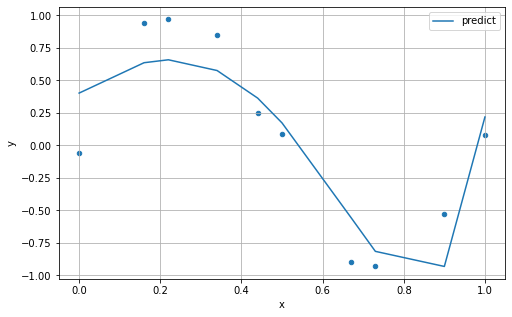

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame({
    "x": X,
    "y": Y,
    "predict": model.predict(X)
})


fig, ax = plt.subplots(figsize=(8, 5))
df.plot.scatter(x="x", y="y", grid=True, ax=ax)
df.plot.line(x="x", y="predict", grid=True, ax=ax)